In [1]:
import importlib
import models
import helper_funtions
import preprocess
import settings

importlib.reload(settings)
importlib.reload(models)
importlib.reload(helper_funtions)
importlib.reload(preprocess)

import torch
import numpy as np
from models.LSTM import LSTM_HumanFi, CNN_LSTM, CNN_BiLSTM_TemporalAttention, CNN_BiLSTM_ChannelAttention, CNN_BiLSTM_DualAttention, CNN_BiLSTM_Attention
from models.RadioNet import RadioNet_NeuralWave
from models.ResNet import ECAResNet1D, ECABasicBlock1D, ResNet1D_JARILWWF, OptResNet1D_JARILWWF, OptECAResNet1D_JARILWWF, CustomResNet1D, CustomECAResNet1D
from models.TemporalConvNet import TemporalConvNet
from helper_funtions import grid_search, get_varying_people_data, plot_people_vs_accuracy, run_experiment_with_seeds
from preprocess import DataPreprocessor
from settings import DEVICE, CRITERION, folder_path_5ghz_10hz_collected, folder_path_5ghz_200hz_collected, folder_path_60ghz_collected, output_path, NUM_EPOCHS, ROWS_PER_SECOND, INPUT_DIM

In [2]:
# temporalconvnet
# {'num_inputs': x, 'num_channels': [64, 128, 128], 'kernel_size': 2, 'dropout': 0.5}
# mixup

signal_configs = {
    '5ghz_10hz': {
        'model_class': TemporalConvNet,
        'model_args': {
            'num_inputs': INPUT_DIM['5ghz_10hz'],
            'num_channels': [64, 128, 128],
            'kernel_size': 2,
            'dropout': 0.5
        },
        'folder_path': folder_path_5ghz_10hz_collected,
        'background_subtraction': True,
        'num_epochs': NUM_EPOCHS,
        'rows_per_second': ROWS_PER_SECOND['5ghz_10hz']
    },
    '5ghz_200hz': {
        'model_class': TemporalConvNet,
        'model_args': {
            'num_inputs': INPUT_DIM['5ghz_200hz'],
            'num_channels': [64, 128, 128],
            'kernel_size': 2,
            'dropout': 0.5
        },
        'folder_path': folder_path_5ghz_200hz_collected,
        'background_subtraction': True,
        'num_epochs': NUM_EPOCHS,
        'rows_per_second': ROWS_PER_SECOND['5ghz_200hz']
    },
    '60ghz_collected': {
        'model_class': TemporalConvNet,
        'model_args': {
            'num_inputs': INPUT_DIM['60ghz_collected'],
            'num_channels': [64, 128, 128],
            'kernel_size': 2,
            'dropout': 0.5
        },
        'folder_path': folder_path_60ghz_collected,
        'background_subtraction': True,
        'num_epochs': NUM_EPOCHS,
        'rows_per_second': ROWS_PER_SECOND['60ghz_collected']
    }
}

people_counts = [5, 10, 15, 20]
accuracy_type = 2 # 1 for validation accuracy, 2 for test accuracy
num_seeds = 3

In [3]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_varying_people_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='people_counts',
                                                                varying_param_value=people_counts,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=5)

Running experiment for 5ghz_10hz...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 97 (no improvement in 50 epochs)
Training time:  0:00:42.848311

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 183 (no improvement in 50 epochs)
Training time:  0:02:36.113344

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 301 (no improvement in 50 epochs)
Training time:  0:06:08.350083

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 215 (no improvement in 50 epochs)
Training time:  0:06:00.042370

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 74 (no improvement in 50 epochs)
Training time:  0:00:32.927019

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 106 (no improvement in 50 epochs)
Training time:  0:01:33.766608

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 288 (no improvement in 50 epochs)
Training time:  0:06:16.396173

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 262 (no improvement in 50 epochs)
Training time:  0:07:28.661053

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 78 (no improvement in 50 epochs)
Training time:  0:00:34.787055

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 206 (no improvement in 50 epochs)
Training time:  0:03:00.240747

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 165 (no improvement in 50 epochs)
Training time:  0:03:29.826566

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 386 (no improvement in 50 epochs)
Training time:  0:11:01.343014
seed outputs:  [([5, 10, 15, 20], [1.0, 1.0, 0.98, 0.96], [1.0, 0.92, 0.96, 0.91]), ([5, 10, 15, 20], [1.0, 0.94, 1.0, 0.96], [1.0, 0.94, 0.98, 0.91]), ([5, 10, 15, 20], [1.0, 1.0, 1.0, 0.96], [1.0, 1.0, 0.92, 0.86])]
Running experiment for 5ghz_200hz...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 318 (no improvement in 50 epochs)
Training time:  0:02:26.170727

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 94 (no improvement in 50 epochs)
Training time:  0:01:25.448852

==== Running for 15 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 256 (no improvement in 50 epochs)
Training time:  0:05:46.708630

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 249 (no improvement in 50 epochs)
Training time:  0:06:50.049822

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 122 (no improvement in 50 epochs)
Training time:  0:01:02.004347

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 137 (no improvement in 50 epochs)
Training time:  0:02:05.552543

==== Running for 15 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Training time:  0:11:29.624704

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 262 (no improvement in 50 epochs)
Training time:  0:07:03.250006

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 185 (no improvement in 50 epochs)
Training time:  0:01:22.238653

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 305 (no improvement in 50 epochs)
Training time:  0:04:35.945629

==== Running for 15 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 348 (no improvement in 50 epochs)
Training time:  0:07:49.804827

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 182 (no improvement in 50 epochs)
Training time:  0:04:50.071614
seed outputs:  [([5, 10, 15, 20], [1.0, 0.97, 1.0, 0.97], [1.0, 1.0, 1.0, 0.9]), ([5, 10, 15, 20], [1.0, 0.97, 0.98, 0.98], [1.0, 0.97, 0.96, 0.95]), ([5, 10, 15, 20], [1.0, 0.94, 1.0, 0.98], [0.94, 0.97, 0.98, 0.95])]
Running experiment for 60ghz_collected...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 77 (no improvement in 50 epochs)
Training time:  0:00:33.184392

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 123 (no improvement in 50 epochs)
Training time:  0:01:45.524781

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 136 (no improvement in 50 epochs)
Training time:  0:02:50.728990

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 179 (no improvement in 50 epochs)
Training time:  0:05:02.033697

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 60 (no improvement in 50 epochs)
Training time:  0:00:25.395666

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 123 (no improvement in 50 epochs)
Training time:  0:01:47.060173

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 212 (no improvement in 50 epochs)
Training time:  0:04:33.801045

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 148 (no improvement in 50 epochs)
Training time:  0:04:09.782850

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 91 (no improvement in 50 epochs)
Training time:  0:00:40.086855

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 197 (no improvement in 50 epochs)
Training time:  0:02:48.681471

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 170 (no improvement in 50 epochs)
Training time:  0:03:34.326355

==== Running for 20 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 199 (no improvement in 50 epochs)
Training time:  0:05:33.611690
seed outputs:  [([5, 10, 15, 20], [1.0, 0.97, 0.96, 0.96], [0.88, 0.91, 0.92, 0.96]), ([5, 10, 15, 20], [1.0, 1.0, 0.98, 0.99], [0.89, 0.94, 0.98, 0.94]), ([5, 10, 15, 20], [1.0, 1.0, 0.98, 0.99], [0.94, 0.94, 0.92, 0.93])]


In [4]:
results_per_signal

{'5ghz_10hz': ([5, 10, 15, 20],
  [1.0, 0.9533333333333333, 0.9533333333333333, 0.8933333333333334]),
 '5ghz_200hz': ([5, 10, 15, 20], [0.98, 0.98, 0.98, 0.9333333333333332]),
 '60ghz_collected': ([5, 10, 15, 20],
  [0.9033333333333333, 0.93, 0.94, 0.9433333333333334])}

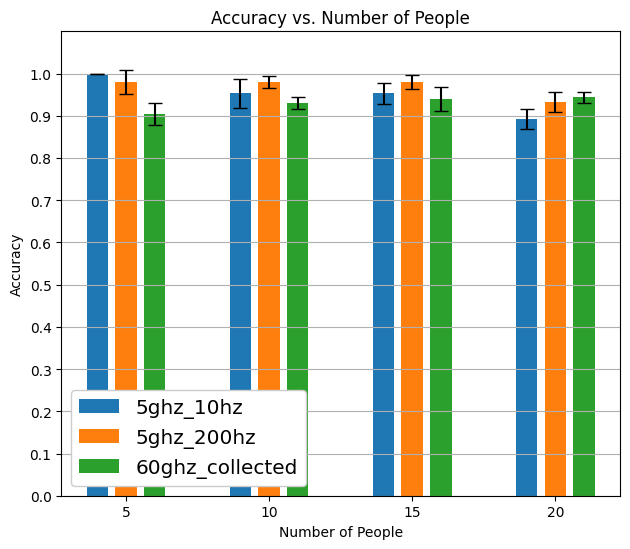

In [5]:
plot_people_vs_accuracy(results_dict=results_per_signal, 
                        std_dict=stds_per_signal, 
                        output_path=output_path)

In [6]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_varying_people_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='people_counts',
                                                                varying_param_value=people_counts,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=3)

Running experiment for 5ghz_10hz...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 87 (no improvement in 50 epochs)
Training time:  0:01:01.940400

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 225 (no improvement in 50 epochs)
Training time:  0:05:20.714129

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 213 (no improvement in 50 epochs)
Training time:  0:07:27.159683

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 203 (no improvement in 50 epochs)
Training time:  0:09:31.144397

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 186 (no improvement in 50 epochs)
Training time:  0:02:12.387250

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 212 (no improvement in 50 epochs)
Training time:  0:05:03.318153

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 177 (no improvement in 50 epochs)
Training time:  0:06:14.324730

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 153 (no improvement in 50 epochs)
Training time:  0:06:54.367079

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 105 (no improvement in 50 epochs)
Training time:  0:01:15.536032

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 235 (no improvement in 50 epochs)
Training time:  0:05:21.768878

==== Running for 15 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 141 (no improvement in 50 epochs)
Training time:  0:04:44.893759

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 355 (no improvement in 50 epochs)
Training time:  0:16:01.253632
seed outputs:  [([5, 10, 15, 20], [1.0, 1.0, 0.99, 0.93], [1.0, 0.93, 0.91, 0.89]), ([5, 10, 15, 20], [1.0, 0.97, 0.97, 0.93], [1.0, 0.92, 0.89, 0.83]), ([5, 10, 15, 20], [1.0, 0.98, 0.92, 0.96], [1.0, 0.94, 0.89, 0.88])]
Running experiment for 5ghz_200hz...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 151 (no improvement in 50 epochs)
Training time:  0:01:44.311863

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 263 (no improvement in 50 epochs)
Training time:  0:06:34.266038

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 136 (no improvement in 50 epochs)
Training time:  0:04:56.388173

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 249 (no improvement in 50 epochs)
Training time:  0:10:55.137259

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 195 (no improvement in 50 epochs)
Training time:  0:02:29.600386

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 275 (no improvement in 50 epochs)
Training time:  0:06:47.348797

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 159 (no improvement in 50 epochs)
Training time:  0:05:57.558151

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 168 (no improvement in 50 epochs)
Training time:  0:07:19.230094

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 187 (no improvement in 50 epochs)
Training time:  0:02:13.226056

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 381 (no improvement in 50 epochs)
Training time:  0:33:17.049198

==== Running for 15 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 226 (no improvement in 50 epochs)
Training time:  0:10:54.783225

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 252 (no improvement in 50 epochs)
Training time:  0:10:11.818835
seed outputs:  [([5, 10, 15, 20], [1.0, 1.0, 0.97, 0.98], [1.0, 0.95, 0.92, 0.91]), ([5, 10, 15, 20], [1.0, 0.98, 0.98, 0.99], [1.0, 0.93, 0.9, 0.88]), ([5, 10, 15, 20], [1.0, 0.98, 0.97, 0.97], [0.97, 0.92, 0.93, 0.9])]
Running experiment for 60ghz_collected...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 56 (no improvement in 50 epochs)
Training time:  0:00:38.516993

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 196 (no improvement in 50 epochs)
Training time:  0:12:58.803187

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 181 (no improvement in 50 epochs)
Training time:  0:24:49.694262

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 223 (no improvement in 50 epochs)
Training time:  0:09:18.277904

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 89 (no improvement in 50 epochs)
Training time:  0:00:56.557941

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 94 (no improvement in 50 epochs)
Training time:  0:01:59.924844

==== Running for 15 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 203 (no improvement in 50 epochs)
Training time:  0:06:30.549708

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 188 (no improvement in 50 epochs)
Training time:  0:07:51.145879

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 117 (no improvement in 50 epochs)
Training time:  0:01:16.081170

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 114 (no improvement in 50 epochs)
Training time:  0:02:24.160446

==== Running for 15 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 162 (no improvement in 50 epochs)
Training time:  0:05:02.850815

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 241 (no improvement in 50 epochs)
Training time:  0:10:03.769140
seed outputs:  [([5, 10, 15, 20], [1.0, 0.93, 0.98, 0.97], [0.9, 0.93, 0.91, 0.94]), ([5, 10, 15, 20], [1.0, 1.0, 0.99, 0.97], [0.9, 0.97, 0.97, 0.94]), ([5, 10, 15, 20], [1.0, 1.0, 0.94, 0.96], [1.0, 0.97, 0.93, 0.91])]


In [7]:
results_per_signal

{'5ghz_10hz': ([5, 10, 15, 20],
  [1.0, 0.93, 0.8966666666666666, 0.8666666666666667]),
 '5ghz_200hz': ([5, 10, 15, 20],
  [0.9899999999999999,
   0.9333333333333332,
   0.9166666666666666,
   0.8966666666666666]),
 '60ghz_collected': ([5, 10, 15, 20],
  [0.9333333333333332, 0.9566666666666667, 0.9366666666666666, 0.93])}

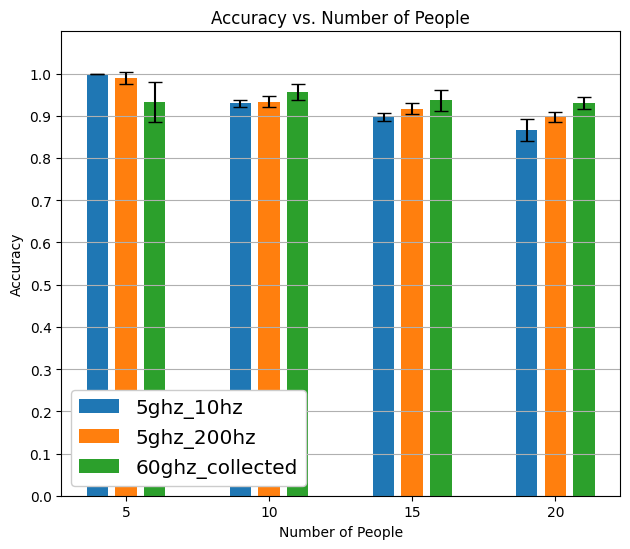

In [8]:
plot_people_vs_accuracy(results_dict=results_per_signal, 
                        std_dict=stds_per_signal, 
                        output_path=output_path,)

In [9]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_varying_people_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='people_counts',
                                                                varying_param_value=people_counts,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=2)

Running experiment for 5ghz_10hz...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 74 (no improvement in 50 epochs)
Training time:  0:01:10.631184

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 234 (no improvement in 50 epochs)
Training time:  0:07:22.940006

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 196 (no improvement in 50 epochs)
Training time:  0:09:09.439091

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 157 (no improvement in 50 epochs)
Training time:  0:09:51.865369

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 118 (no improvement in 50 epochs)
Training time:  0:01:52.442530

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 170 (no improvement in 50 epochs)
Training time:  0:05:26.941674

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 247 (no improvement in 50 epochs)
Training time:  0:11:45.997367

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 229 (no improvement in 50 epochs)
Training time:  0:14:23.620677

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 91 (no improvement in 50 epochs)
Training time:  0:01:28.751085

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 138 (no improvement in 50 epochs)
Training time:  0:04:26.940504

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 339 (no improvement in 50 epochs)
Training time:  0:16:01.339001

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 233 (no improvement in 50 epochs)
Training time:  0:14:36.298364
seed outputs:  [([5, 10, 15, 20], [1.0, 0.99, 0.95, 0.9], [0.98, 0.96, 0.83, 0.83]), ([5, 10, 15, 20], [1.0, 0.96, 0.95, 0.93], [1.0, 0.85, 0.92, 0.85]), ([5, 10, 15, 20], [0.98, 0.96, 0.95, 0.94], [1.0, 0.85, 0.82, 0.85])]
Running experiment for 5ghz_200hz...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 204 (no improvement in 50 epochs)
Training time:  0:03:24.407701

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 177 (no improvement in 50 epochs)
Training time:  0:05:54.573185

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 228 (no improvement in 50 epochs)
Training time:  0:11:17.374505

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 197 (no improvement in 50 epochs)
Training time:  0:11:43.272220

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 169 (no improvement in 50 epochs)
Training time:  0:02:56.221577

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 109 (no improvement in 50 epochs)
Training time:  0:03:36.976495

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 226 (no improvement in 50 epochs)
Training time:  0:11:19.552074

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 148 (no improvement in 50 epochs)
Training time:  0:08:51.912060

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 144 (no improvement in 50 epochs)
Training time:  0:02:21.687755

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 199 (no improvement in 50 epochs)
Training time:  0:06:42.199483

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 201 (no improvement in 50 epochs)
Training time:  0:10:10.053331

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 149 (no improvement in 50 epochs)
Training time:  0:08:48.855692
seed outputs:  [([5, 10, 15, 20], [1.0, 1.0, 0.97, 0.96], [0.98, 0.99, 0.91, 0.91]), ([5, 10, 15, 20], [1.0, 0.98, 0.96, 0.94], [1.0, 0.91, 0.87, 0.87]), ([5, 10, 15, 20], [1.0, 0.96, 0.96, 0.96], [0.96, 0.93, 0.88, 0.88])]
Running experiment for 60ghz_collected...

--- Running seed 42 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 54 (no improvement in 50 epochs)
Training time:  0:00:55.884793

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 160 (no improvement in 50 epochs)
Training time:  0:05:03.227201

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 86 (no improvement in 50 epochs)
Training time:  0:04:00.499064

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 143 (no improvement in 50 epochs)
Training time:  0:09:11.723238

--- Running seed 420 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 54 (no improvement in 50 epochs)
Training time:  0:00:52.627161

==== Running for 10 people ====


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 140 (no improvement in 50 epochs)
Training time:  0:04:30.643853

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 95 (no improvement in 50 epochs)
Training time:  0:04:30.540895

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 141 (no improvement in 50 epochs)
Training time:  0:08:47.581429

--- Running seed 101010 ---

==== Running for 5 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 91 (no improvement in 50 epochs)
Training time:  0:01:28.593175

==== Running for 10 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 126 (no improvement in 50 epochs)
Training time:  0:04:01.241014

==== Running for 15 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 185 (no improvement in 50 epochs)
Training time:  0:08:37.045437

==== Running for 20 people ====

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 142 (no improvement in 50 epochs)
Training time:  0:08:51.239913
seed outputs:  [([5, 10, 15, 20], [1.0, 0.97, 0.92, 0.92], [0.92, 0.93, 0.86, 0.87]), ([5, 10, 15, 20], [1.0, 1.0, 0.92, 0.95], [0.92, 0.98, 0.91, 0.88]), ([5, 10, 15, 20], [0.98, 1.0, 0.93, 0.93], [1.0, 0.95, 0.87, 0.9])]


In [10]:
results_per_signal

{'5ghz_10hz': ([5, 10, 15, 20],
  [0.9933333333333333,
   0.8866666666666667,
   0.8566666666666666,
   0.8433333333333333]),
 '5ghz_200hz': ([5, 10, 15, 20],
  [0.98, 0.9433333333333334, 0.8866666666666667, 0.8866666666666667]),
 '60ghz_collected': ([5, 10, 15, 20],
  [0.9466666666666667, 0.9533333333333335, 0.88, 0.8833333333333333])}

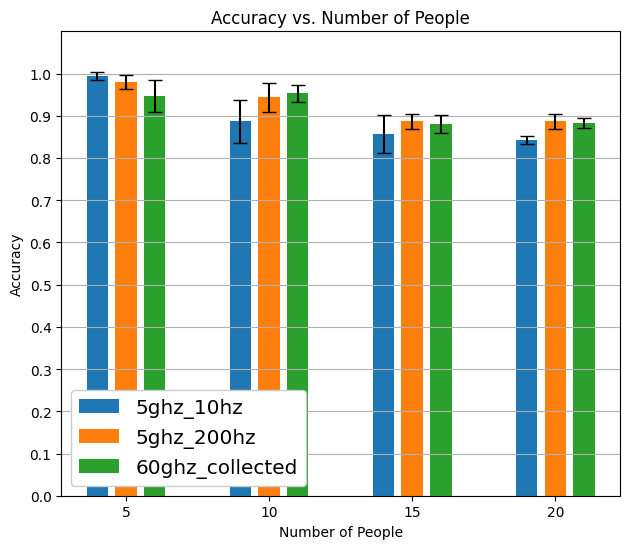

In [11]:
plot_people_vs_accuracy(results_dict=results_per_signal, 
                        std_dict=stds_per_signal, 
                        output_path=output_path)

In [ ]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_varying_people_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='people_counts',
                                                                varying_param_value=people_counts,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=1)

In [ ]:
results_per_signal

In [ ]:
plot_people_vs_accuracy(results_dict=results_per_signal, 
                        std_dict=stds_per_signal, 
                        output_path=output_path)